Load Data

In [33]:
# Load data
import pandas as pd
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Data Exploration

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [35]:
data['label'].value_counts()

label
male      1584
female    1584
Name: count, dtype: int64

Preprocessing

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan label
X = data.drop('label', axis=1)
y = data['label']

# Konversi label menjadi angka (male=0, female=1)
y = y.map({'male': 0, 'female': 1})

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Buat Model kNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Model kNN awal (misal k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Evaluasi Model

In [38]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9810725552050473
Confusion Matrix:
 [[331   6]
 [  6 291]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       337
           1       0.98      0.98      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Mencari Fitur Paling Optimal

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pilih fitur terbaik
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_train_scaled, y_train)

# Tampilkan fitur dengan skor tertinggi
best_features = X.columns[selector.get_support()]
print("Fitur terbaik:", best_features)

Fitur terbaik: Index(['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun'], dtype='object')


Menentukan Nilai k Terbaik

In [40]:
import matplotlib.pyplot as plt
import numpy as np

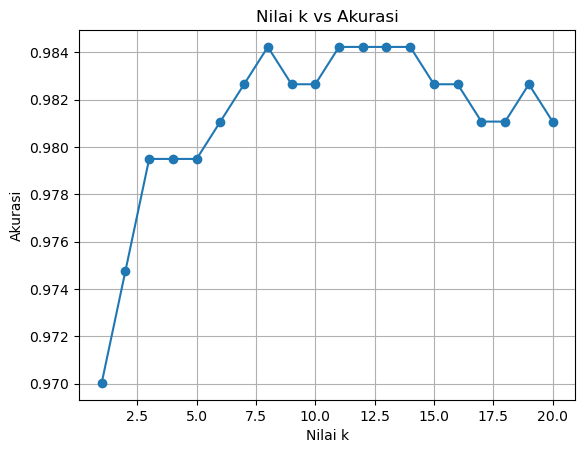

Nilai k terbaik: 8, dengan akurasi 0.9842


In [43]:
# Ambil hanya fitur terbaik
X_selected = data[best_features]
y = data['label'].map({'male': 0, 'female': 1})

# Split dan normalisasi ulang
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Uji berbagai nilai k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot akurasi vs k
plt.plot(k_values, accuracies, marker='o')
plt.title('Nilai k vs Akurasi')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

# Tampilkan k terbaik
best_k = k_values[np.argmax(accuracies)]
print(f"Nilai k terbaik: {best_k}, dengan akurasi {max(accuracies):.4f}")


In [44]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

print("Accuracy dengan k terbaik:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix dengan k terbaik:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report dengan k terbaik:\n", classification_report(y_test, y_pred_best))

Accuracy dengan k terbaik: 0.9842271293375394
Confusion Matrix dengan k terbaik:
 [[331   6]
 [  4 293]]

Classification Report dengan k terbaik:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       337
           1       0.98      0.99      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Using the selected features (sd, Q25, IQR, sp.ent, meanfun) and the optimal value k = 8 makes the kNN model achieved the highest accuracy of 98.42%.
With the optimized model:
- 331 male voices were correctly classified as male.
- 6 male voices were incorrectly classified as female.
- 293 female voices were correctly classified as female.
- Only 4 female voices were incorrectly classified as male.